In [3]:
# Core Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import re
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

# ✅ Use TensorFlow's built-in Keras (recommended since TF 2.x)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


### **Read Dataset**

In [4]:
df=pd.read_csv("/content/mental_health_sentiment_analysis.csv")

In [5]:
df

Unnamed: 0                                          statement   status
0               0                                         oh my gosh  Anxiety
1               1  trouble sleeping, confused mind, restless hear...  Anxiety
2               2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3               3  I've shifted my focus to something else but I'...  Anxiety
4               4  I'm restless and restless, it's been a month n...  Anxiety
...           ...                                                ...      ...
53038       53038  Nobody takes me seriously I’ve (24M) dealt wit...  Anxiety
53039       53039  selfishness  "I don't feel very good, it's lik...  Anxiety
53040       53040  Is there any way to sleep better? I can't slee...  Anxiety
53041       53041  Public speaking tips? Hi, all. I have to give ...  Anxiety
53042       53042  I have really bad door anxiety! It's not about...  Anxiety

[53043 rows x 3 columns]

### **Data Preprocessing**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.isnull().sum()

statement    362
status         0
dtype: int64

In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
df.isnull().sum()

statement    0
status       0
dtype: int64

In [11]:
# Get most common words
all_words=[]

for line in df['statement']:
    words=line.split()
    for word in words:
        if len(word)>2:
            all_words.append(word.lower())

Counter(all_words).most_common(50)

[('and', 174838),
 ('the', 126412),
 ('not', 74161),
 ('have', 69143),
 ('that', 64432),
 ('but', 55707),
 ('for', 53663),
 ('just', 48452),
 ('this', 41661),
 ('with', 40552),
 ('was', 37232),
 ('like', 37128),
 ('feel', 31010),
 ('you', 28826),
 ('want', 26851),
 ('about', 24678),
 ('all', 23657),
 ('because', 22234),
 ('know', 22052),
 ('what', 22042),
 ('been', 21832),
 ('get', 21507),
 ('when', 19502),
 ('they', 19227),
 ('can', 18706),
 ('even', 18505),
 ('are', 18462),
 ('will', 18388),
 ('how', 18167),
 ('out', 18154),
 ('had', 17996),
 ('would', 16686),
 ('myself', 16273),
 ('she', 16063),
 ('really', 15916),
 ('life', 15790),
 ('from', 15199),
 ('cannot', 14968),
 ('people', 14523),
 ('time', 13741),
 ('one', 13512),
 ('going', 13424),
 ('now', 12796),
 ('think', 12477),
 ('never', 11685),
 ('being', 11448),
 ('there', 11433),
 ('her', 11360),
 ("i'm", 11122),
 ('has', 11102)]

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
# Define StopWords
stop_words=stopwords.words('english')

In [15]:
def text_preprocessing(text):
    # Make all words lowercase
    text=text.lower()

    # Remove  punction,number & spical char
    text=re.sub('[^a-zA-z]',' ',text)

    # Single char removel
    text=re.sub(r'\s+[a-zA-z]\s+',' ',text)

    # Remove multi spaces
    text=re.sub(r'\s+',' ',text)

    # Make a sentence to toknize
    tokens=word_tokenize(text)

    # Remove Stopwords
    final_token=[i for i in tokens if i not in stop_words]

    # Apply lemma
    final_words=[]
    lemma=WordNetLemmatizer()
    for i in final_token:
        if len(i)>2:
            word=lemma.lemmatize(i)
            final_words.append(word)
    return ' '.join(final_words)

In [17]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [19]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [20]:
df['Clean_Text']=df['statement'].apply(lambda x: text_preprocessing(x))
print('Text Preprocessing is done')

Text Preprocessing is done


###

### **Data Visualization**

In [21]:
target=df['status'].unique()

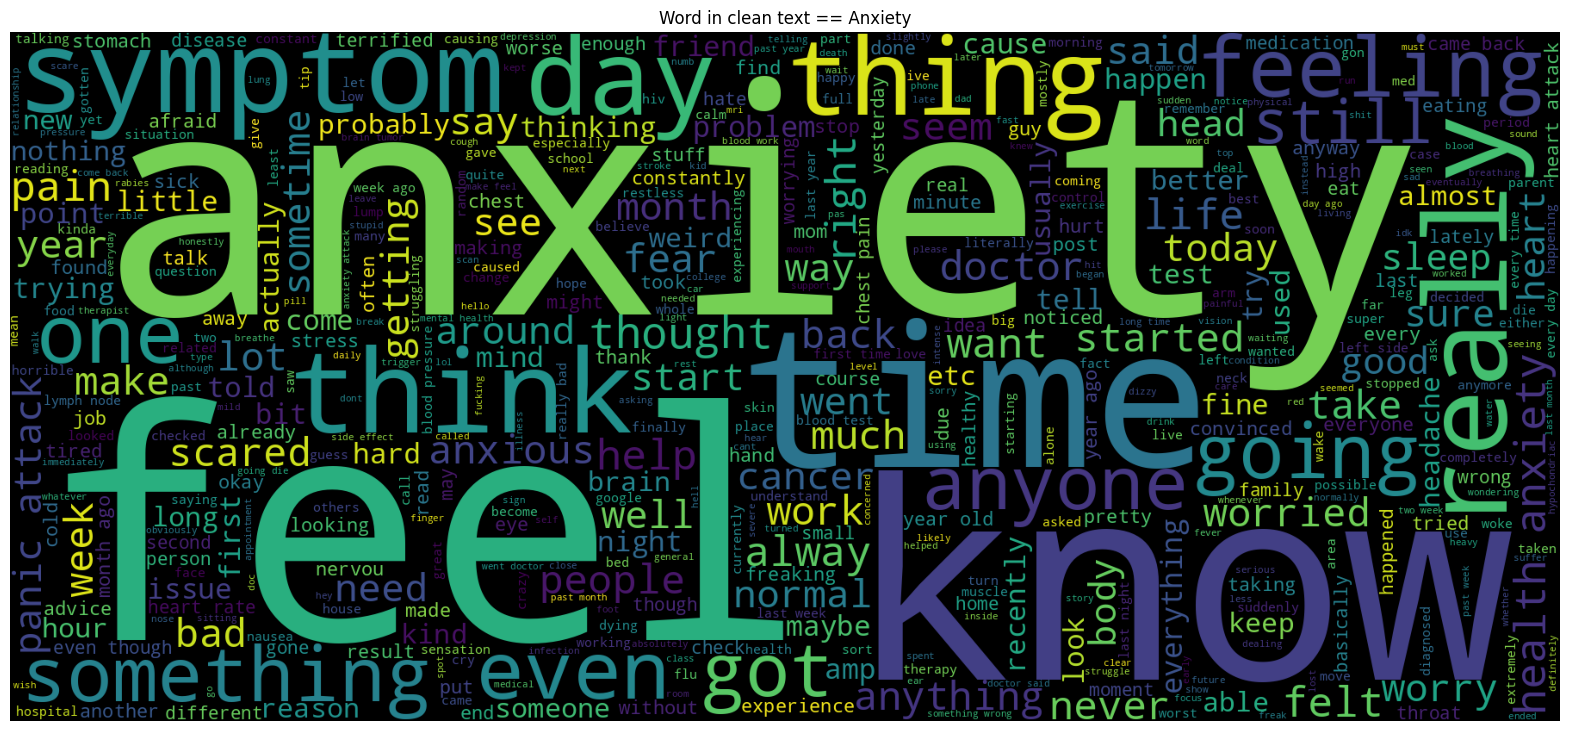

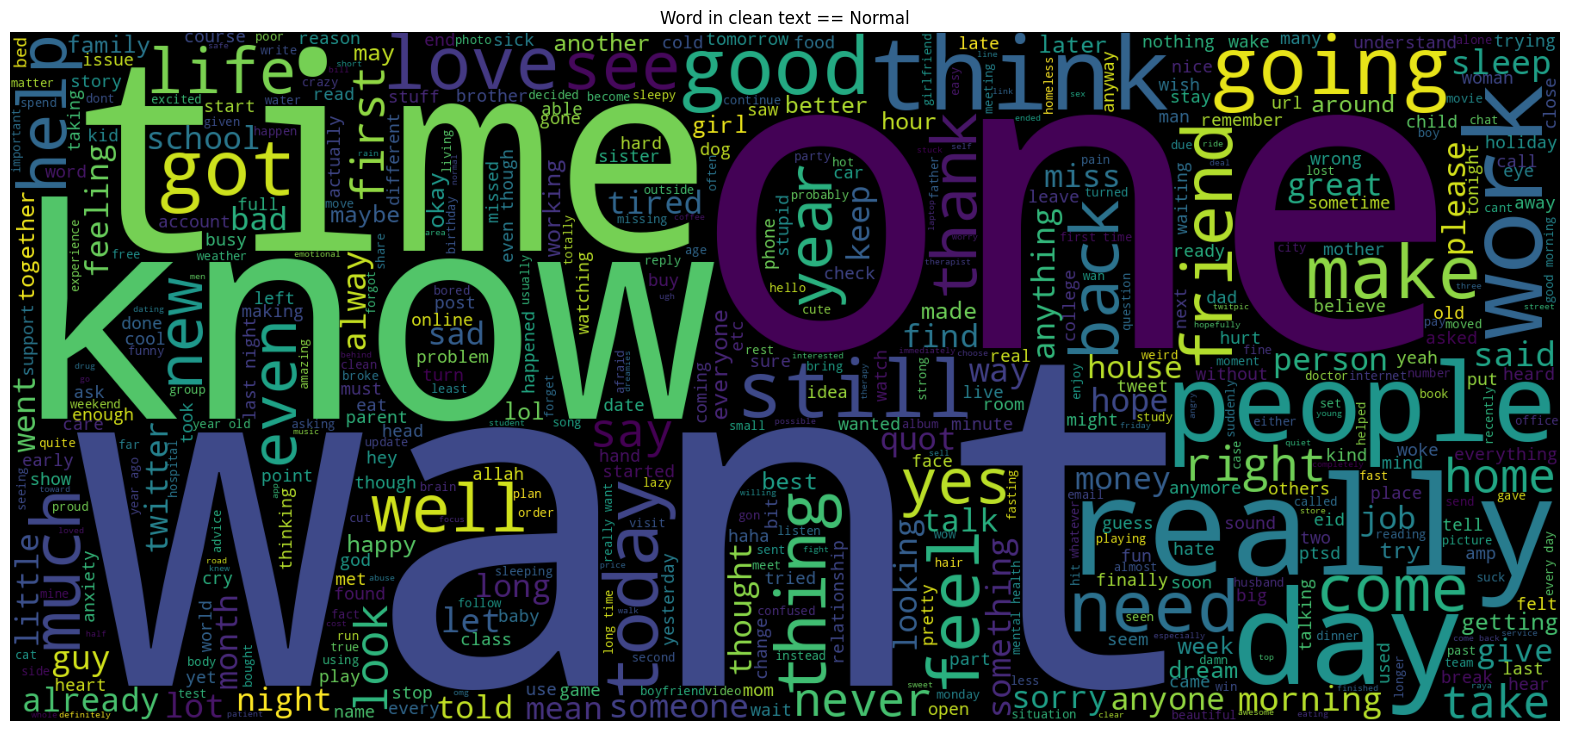

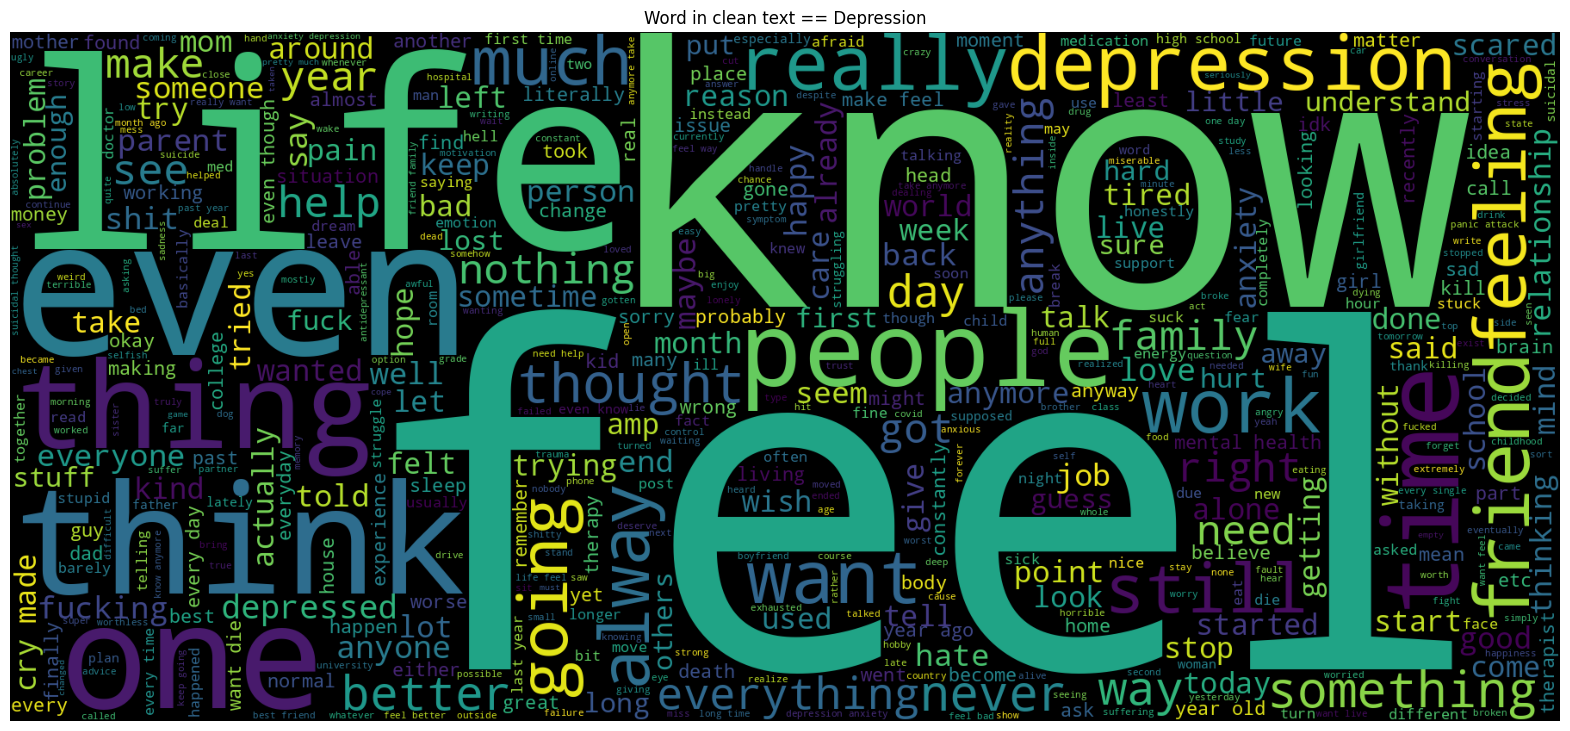

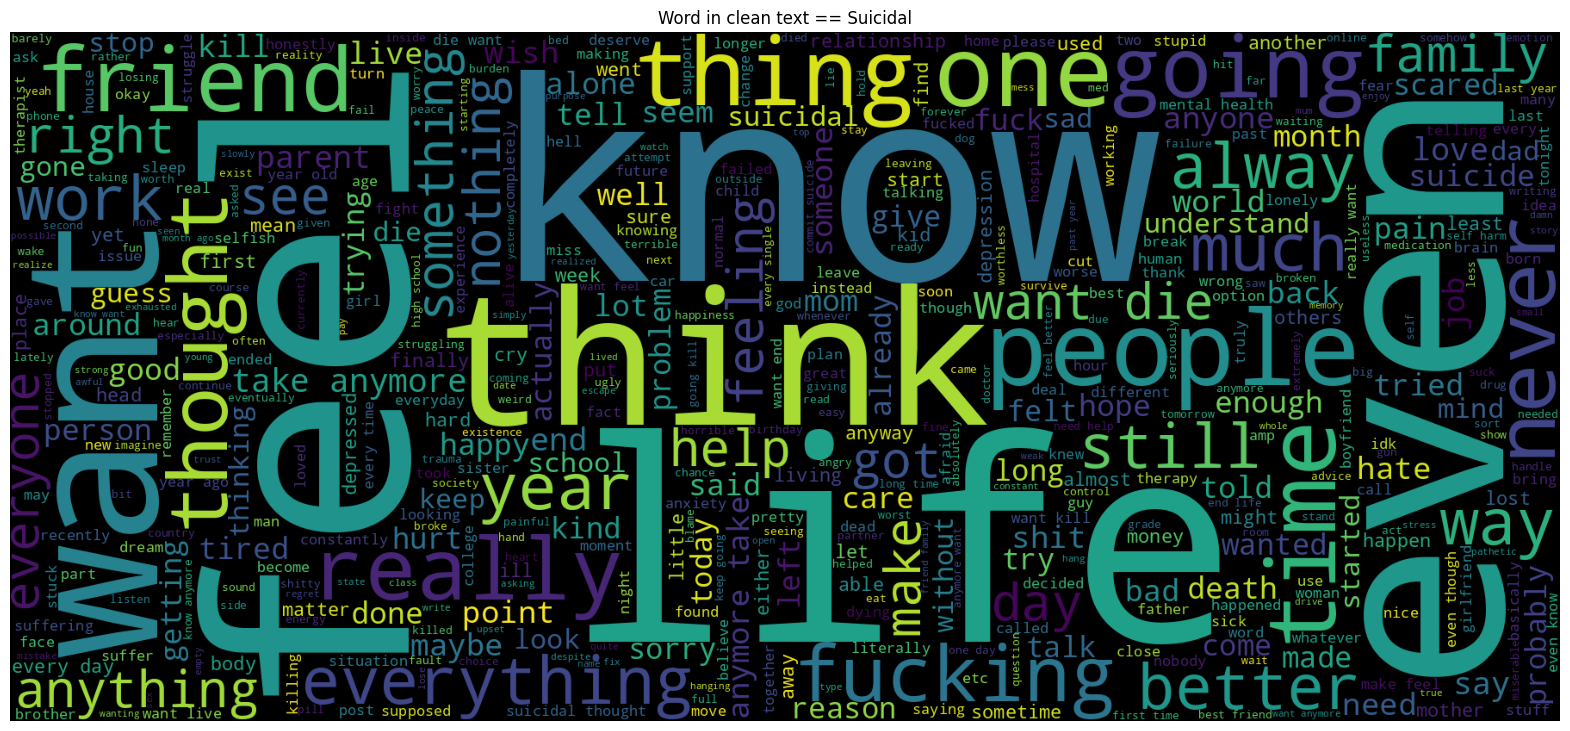

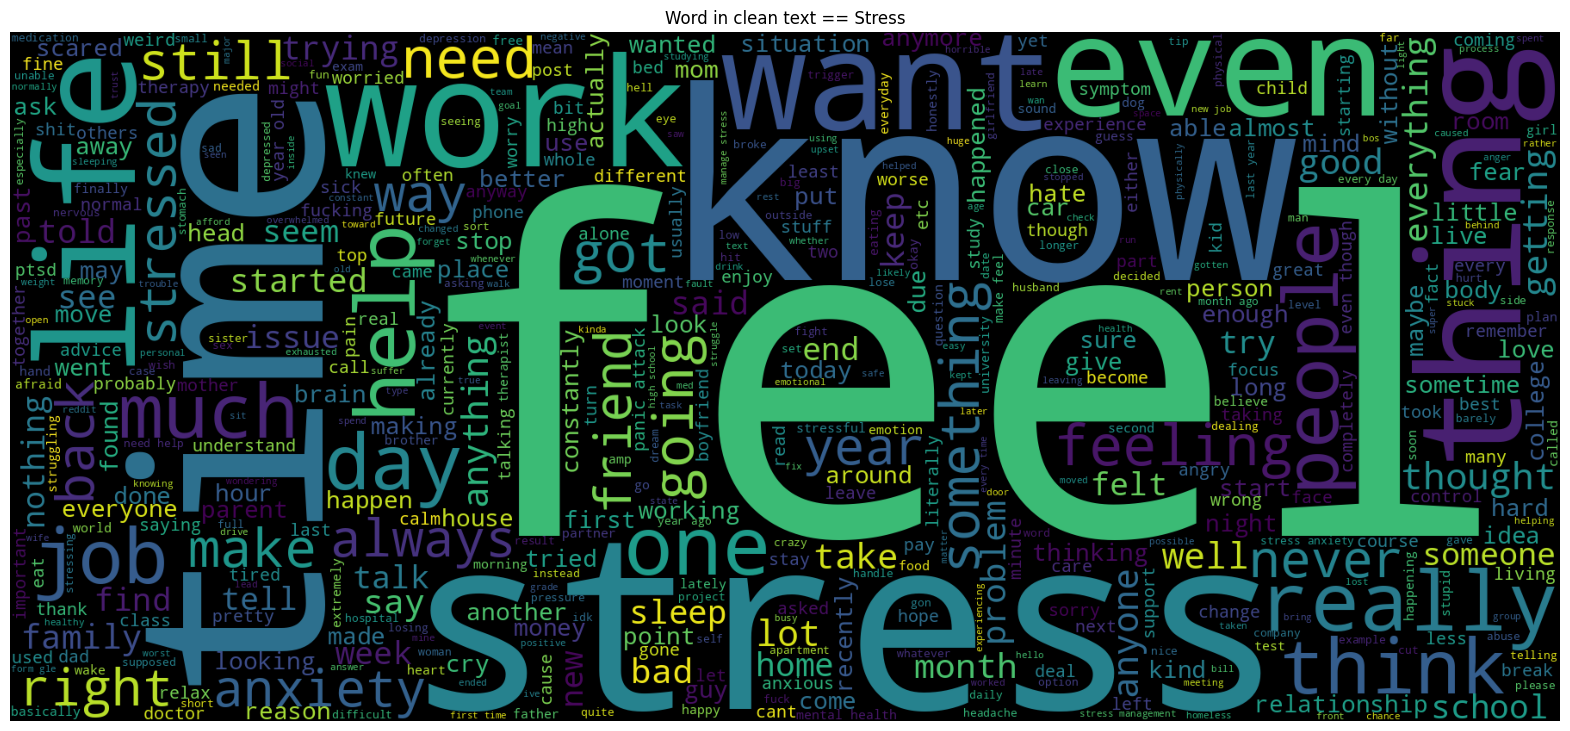

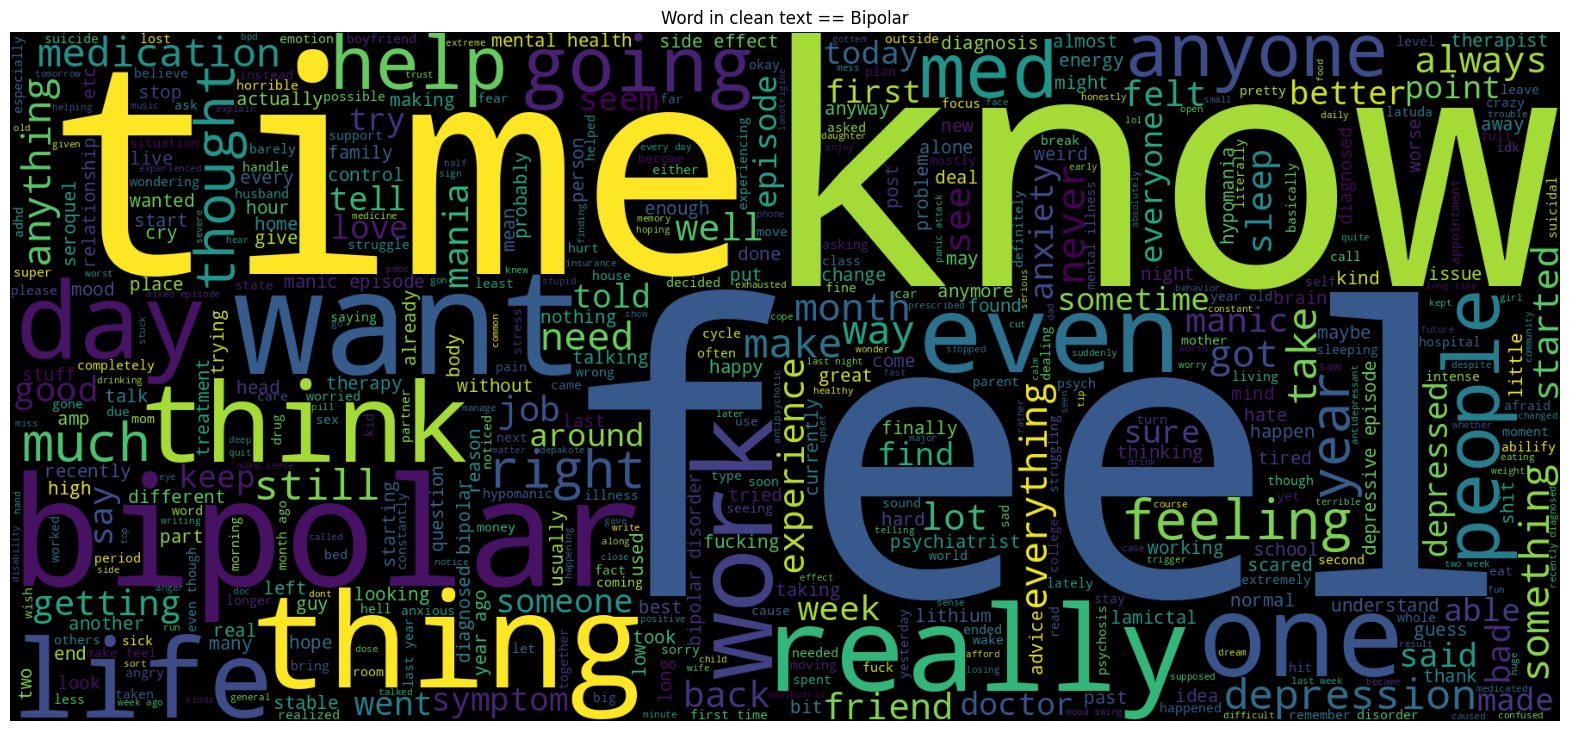

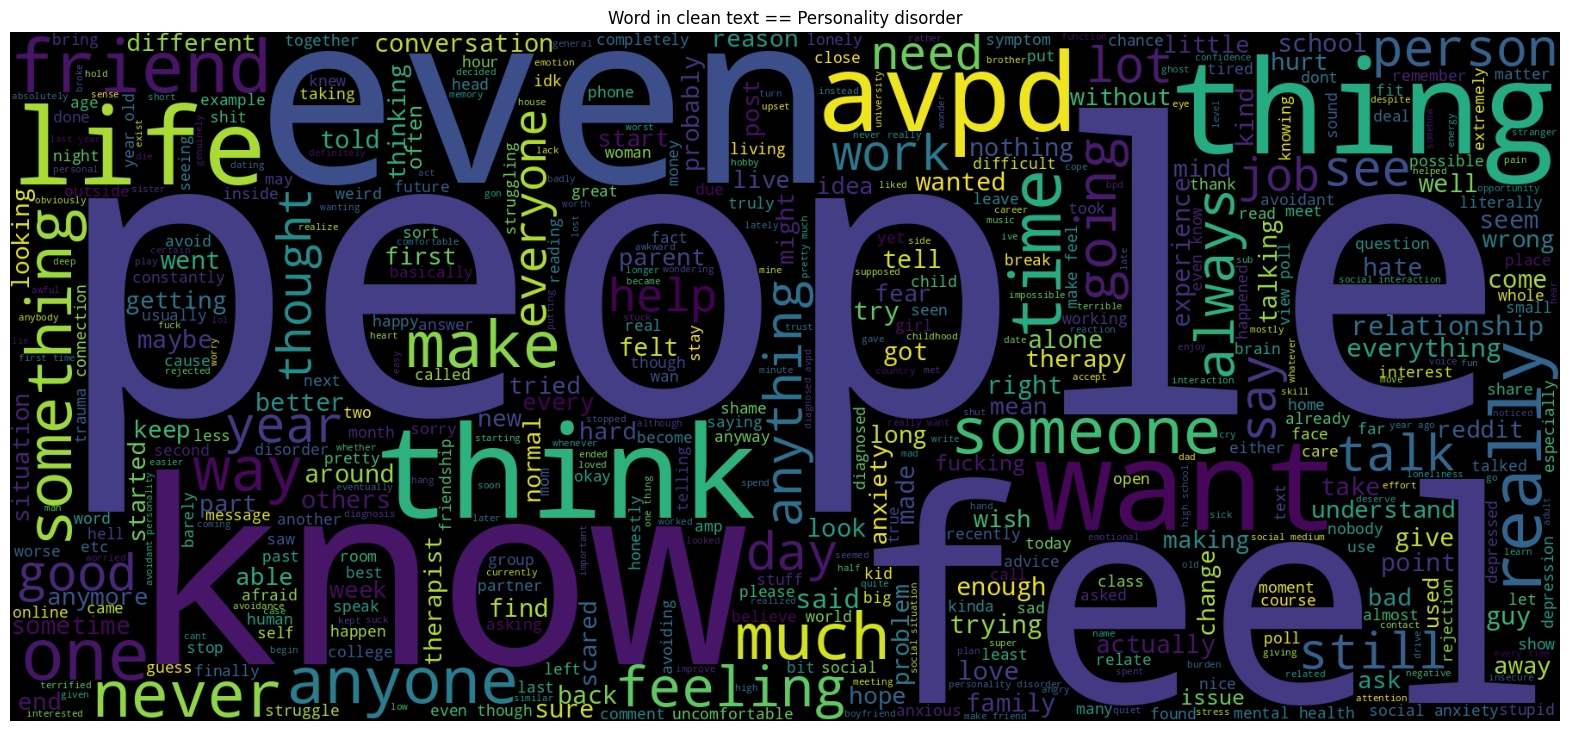

In [22]:
for i in target:
    plt.figure(figsize=(20,15))
    word_cloud=WordCloud(width=1800,height=800,max_words=500).generate(' '.join(df[df.status == i].Clean_Text))
    plt.imshow(word_cloud)
    plt.title(f'Word in clean text == {i}')
    plt.axis('off')
    plt.show()

In [23]:
x=df['Clean_Text']
y=df['status']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

### **Text Preprocessing**

In [25]:
# Convert word to number
tokenizer=Tokenizer(num_words=10000)

# Creat a mapping of words to number
tokenizer.fit_on_texts(x_train)

# Transforming text into sequences
x_train_seq=tokenizer.texts_to_sequences(x_train)
x_test_seq=tokenizer.texts_to_sequences(x_test)

In [26]:
# Padding---> Ensuring all sequences are of the same lenght
max_len=100

x_train_pad=pad_sequences(x_train_seq,maxlen=max_len)
x_test_pad=pad_sequences(x_test_seq,maxlen=max_len)

In [27]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
y_train_enc=label.fit_transform(y_train)
y_test_enc=label.transform(y_test)

### **Build Model**

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, BatchNormalization, LSTM, Dropout, Dense

max_len = 100  # Example — use the same as your preprocessing

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))
model.add(BatchNormalization())
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, max_len))
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,461,959 (5.58 MB)

 Trainable params: 1,461,703 (5.58 MB)

 Non-trainable params: 256 (1.00 KB)

In [31]:
history = model.fit(
    x_train_pad,
    y_train_enc,
    epochs=10,
    batch_size=32,
    validation_data=(x_test_pad,y_test_enc)
)


Epoch 1/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 296s 221ms/step - accuracy: 0.6047 - loss: 1.0791 - val_accuracy: 0.7364 - val_loss: 0.7039
Epoch 2/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 287s 218ms/step - accuracy: 0.7703 - loss: 0.6240 - val_accuracy: 0.7455 - val_loss: 0.6811
Epoch 3/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 322s 218ms/step - accuracy: 0.8249 - loss: 0.4871 - val_accuracy: 0.7425 - val_loss: 0.7130
Epoch 4/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 292s 222ms/step - accuracy: 0.8637 - loss: 0.3823 - val_accuracy: 0.7346 - val_loss: 0.7901
Epoch 5/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 287s 218ms/step - accuracy: 0.8924 - loss: 0.3076 - val_accuracy: 0.7317 - val_loss: 0.8995
Epoch 6/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 327s 222ms/step - accuracy: 0.9150 - loss: 0.2468 - val_accuracy: 0.7266 - val_loss: 0.9822
Epoch 7/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 287s 218ms/step - accuracy: 0.9298 - loss: 0.2021 - val_accuracy: 0.7299 - val_loss: 1.0599
Epoch 8/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 320s 216ms/step - ac

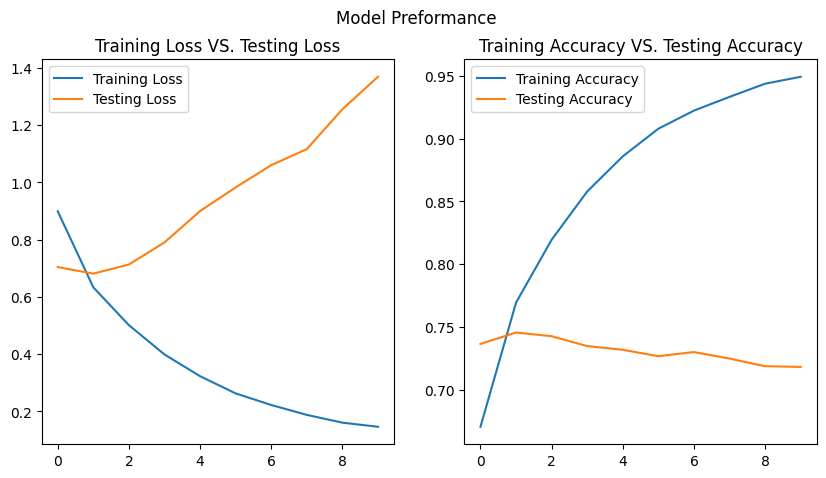

In [32]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Model Preformance')
ax[0].plot(history.history['loss'],label='Training Loss')
ax[0].plot(history.history['val_loss'],label='Testing Loss')
ax[0].set_title('Training Loss VS. Testing Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'],label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Testing Accuracy')
ax[1].set_title('Training Accuracy VS. Testing Accuracy')
ax[1].legend()

### **Test model**

In [33]:
y_pred=model.predict(x_test_pad)
y_pred_class=np.argmax(y_pred,axis=1)
y_pred_label=label.inverse_transform(y_pred_class)

330/330 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step


In [34]:
model.save("model.h5")     # or model.save("model.keras")


In [35]:
import pickle

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


In [37]:

for i in range(10,15):
    print(f"Text: {x_test.iloc[i]}")
    print(f"True label:      {label.inverse_transform([y_test_enc[i]])[0]}")
    print(f"Predicted label: {label.inverse_transform([y_pred_class[i]])[0]}")
    print()


Text: lb live parent drive addicted misuse weed compulsive overeater one disgusting men see anything relationship past sex attention template use describe term manchild manbaby way waste human life see world crumbling prepared world come crumbling hope suffering quick human garbage disposal chuck feel useless feel place world
True label:      Depression
Predicted label: Depression

Text: know actually upset something overly sensitive aka avpd feel like someone boyfriend family upset fault feel like try hardest perfect yet constantly falling way shorter everyone else expected feel like annoyance waste dumb fairly observant people body language tone voice pick lot time wonder making everything need ignore hurt feeling sure navigate situation
True label:      Personality disorder
Predicted label: Personality disorder

Text: positive momentum going week hitting gym eating better felt positive general got two bad night sleep feel miserable ever frustrating mental well fragile fickle borderl